<a href="https://colab.research.google.com/github/SenaBrickwedel/CAP2751/blob/main/CAP2751_Assignment6_STARTER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAP 2751 - Tools for Data Science
***Include the following info by clicking here:***
* Name:Sena Brickwedel
* Canvas Course Section:CAP 2751-1
* Date:11/29/2025
* Link to your Notebook:

# Assignment 6: Deep Learning
## STARTER CODE

### Goals

- To learn how to use perform classification using neural networks.
- To appreciate the differences in neural network architectures for the same task -- image classification -- and dataset (MNIST, CIFAR-10).
- To learn how to implement and evaluate deep learning models in Python, using Keras and TensorFlow.

### Instructions

- This assignment is structured in 2 parts, each using their own dataset(s).
- As usual, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will "automagically" become your report.
- Submit the report (PDF), notebook (.ipynb file), and the link to the "live" version of your solution on Google Colaboratory via Canvas.
- **The number of points is indicated next to each part. They add up to 100.**
- **There are additional (10 points worth of) bonus items**, which are, of course optional.

### Important

- It is OK to attempt the bonus points, but please **do not overdo it!**


## Setup

### Imports


In [ ]:
import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

from matplotlib import pyplot as plt

import numpy as np

## PART 1: Digit classification using MNIST

The MNIST handwritten digit dataset consists of a training set of 60,000 examples, and a test set of 10,000 examples. Each image in the dataset has 28$\times$28 pixels.

http://yann.lecun.com/exdb/mnist/


### 1a. Shallow neural network architecture

Based on https://github.com/the-deep-learners/deep-learning-illustrated/blob/master/notebooks/shallow_net_in_keras.ipynb

#### Load and prepare the data

The Python code below loads the images from the MNIST dataset, flattens them, normalizes them (i.e., maps the intensity values from [0..255] to [0..1]), and displays a few images from the training set.

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and validation sets
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

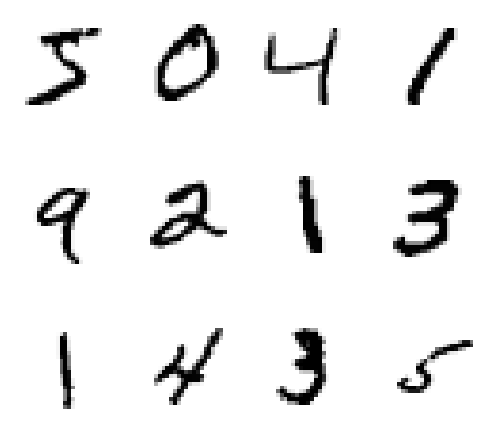

In [ ]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
X_valid.shape

(10000, 28, 28)

In [ ]:
y_valid.shape

(10000,)

In [ ]:
y_valid[0]

7

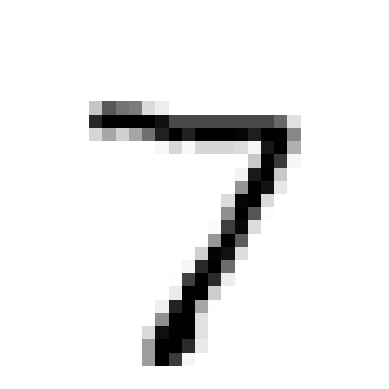

In [ ]:
plt.imshow(X_valid[0], cmap='Greys')
plt.axis('off')
plt.show()

In [ ]:
# Reshape (flatten) images
X_train_reshaped = X_train.reshape(60000, 784).astype('float32')
X_valid_reshaped = X_valid.reshape(10000, 784).astype('float32')

# Scale images to the [0, 1] range
X_train_scaled_reshaped = X_train_reshaped / 255
X_valid_scaled_reshaped = X_valid_reshaped / 255

# Renaming for conciseness
X_training = X_train_scaled_reshaped
X_validation = X_valid_scaled_reshaped

print("X_training shape (after reshaping + scaling):", X_training.shape)
print(X_training.shape[0], "train samples")
print("X_validation shape (after reshaping + scaling):", X_validation.shape)
print(X_validation.shape[0], "validation samples")

X_training shape (after reshaping + scaling): (60000, 784)
60000 train samples
X_validation shape (after reshaping + scaling): (10000, 784)
10000 validation samples


In [ ]:
# convert class vectors to binary class matrices
y_training = tf.keras.utils.to_categorical(y_train, num_classes)
y_validation = tf.keras.utils.to_categorical(y_valid, num_classes)

In [ ]:
print(y_valid[0])
print(y_validation[0])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


#### Build your first neural network model

In [ ]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
(64*784)

50176

In [ ]:
(64*784)+64

50240

In [ ]:
(10*64)+10

650

#### Configure model

In [ ]:
model.compile(
    loss='mean_squared_error',
    optimizer=SGD(learning_rate=0.01),
    metrics=['accuracy']
)

#### Train!

In [ ]:
batch_size=128
epochs=200

history = model.fit(
  X_training, # training data
  y_training, # training targets
  epochs=epochs,
  batch_size=batch_size,
  verbose=1,
  validation_data=(X_validation, y_validation)
)

Epoch 1/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0990 - loss: 0.0943 - val_accuracy: 0.1027 - val_loss: 0.0921
Epoch 2/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1001 - loss: 0.0919 - val_accuracy: 0.1167 - val_loss: 0.0912
Epoch 3/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1212 - loss: 0.0911 - val_accuracy: 0.1587 - val_loss: 0.0906
Epoch 4/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1627 - loss: 0.0905 - val_accuracy: 0.2012 - val_loss: 0.0902
Epoch 5/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2062 - loss: 0.0901 - val_accuracy: 0.2426 - val_loss: 0.0898
Epoch 6/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2413 - loss: 0.0898 - val_accuracy: 0.2663 - val_loss: 0.0894
Epoch 7/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2650 - loss: 0.0893 - val_accuracy: 0.2793 - val_loss: 0.0890
Epoch 8/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2760 - loss: 0.0890 - val_accu

#### Plot learning curves

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


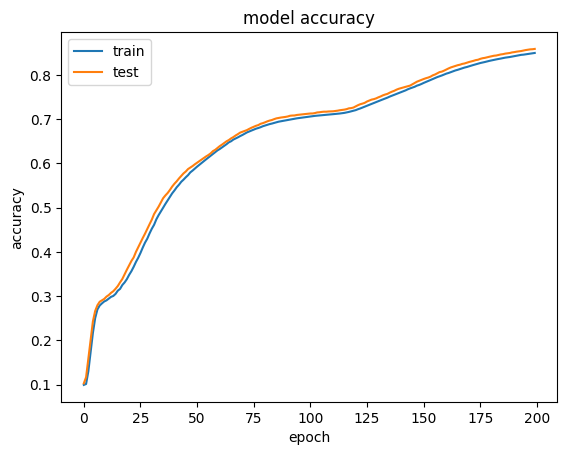

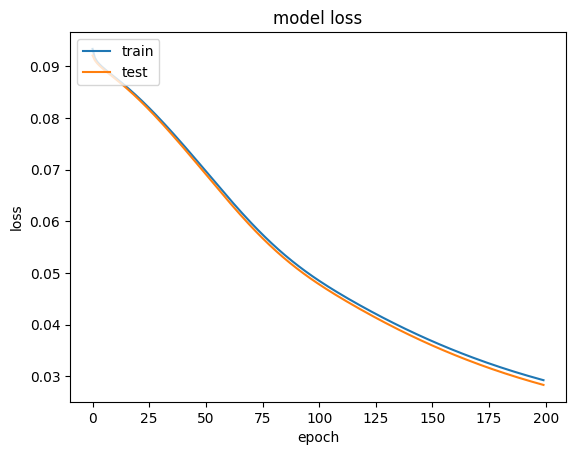

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Evaluate the model

In [ ]:
model.evaluate(X_validation, y_validation)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8397 - loss: 0.0314


[0.028339602053165436, 0.8587999939918518]

### 1.1 Your turn! (30 points)

1. Write code to train the same network with different options for `loss`, `optimizer`, and learning rate, for example:
```
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy']
)
```

2. Write code to train the same network with different options for `batch_size` and number of epochs.

3. Record the several combinations (at least 3, besides the baseline) you have tried and the resulting accuracy in a summary table like this:

| Method | optimizer | learning rate | loss | batch size | epochs | Validation accuracy | Remarks |
| --- | --- | --- | --- | --- | --- | --- | --- |
| Baseline  | SGD | 0.01 | `mean_squared_error` | 128 | 200 | 0.8660 | Comparable to Naive Bayes |
| Variation #1 | ADAM | (default) | `categorical_crossentropy` | 128 | 200 | ... | Improved accuracy thanks to X |
| Variation #2 | ... | ... | `categorical_crossentropy` | 128 | 500 | ... | Improved accuracy thanks to Y |
| Variation #3 | SGD | 0.01 | `categorical_crossentropy` | 128 | 500 | ... | Improved accuracy thanks to Z |

4. Write a short paragraph summarizing what you have learned from this exercise.

### 1b. Convolutional neural network architecture

Based on https://keras.io/examples/vision/mnist_convnet/

In [ ]:
model_cnn = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

#### Configure model

In [ ]:
model_cnn.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

#### Prepare the data
The CNN does not expect the images to be flattened.

In [ ]:
# Reload the data, just in case
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

# convert class vectors to binary class matrices
y_training = to_categorical(y_train, num_classes) # Changed keras.utils.np_utils.to_categorical to to_categorical
y_validation = to_categorical(y_valid, num_classes) # Changed keras.utils.np_utils.to_categorical to to_categorical

# Scale images to the [0, 1] range
X_train_cnn = X_train.astype("float32") / 255
X_valid_cnn = X_valid.astype("float32") / 255

# Redefine  dimension of train/test inputs
X_train_cnn = np.expand_dims(X_train_cnn, -1)
X_valid_cnn = np.expand_dims(X_valid_cnn, -1)

# Make sure images have shape (28, 28, 1)
print("x_train shape:", X_train_cnn.shape)
print(X_train_cnn.shape[0], "train samples")
print(X_valid_cnn.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#### Train!


In [ ]:
batch_size=128
epochs=15

history = model_cnn.fit(
  X_train_cnn, # training data
  y_training, # training targets
  epochs=epochs,
  batch_size=batch_size,
  verbose=1,
  validation_data=(X_valid_cnn, y_validation)
)

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7865 - loss: 0.7037 - val_accuracy: 0.9757 - val_loss: 0.0801
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9651 - loss: 0.1117 - val_accuracy: 0.9833 - val_loss: 0.0537
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9748 - loss: 0.0806 - val_accuracy: 0.9857 - val_loss: 0.0433
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9796 - loss: 0.0663 - val_accuracy: 0.9876 - val_loss: 0.0356
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9817 - loss: 0.0599 - val_accuracy: 0.9891 - val_loss: 0.0349
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9849 - loss: 0.0514 - val_accuracy: 0.9892 - val_loss: 0.0309
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9837 - loss: 0.0480 - val_accuracy: 0.9892 - val_loss: 0.0288
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9864 - loss: 0.0446 - val_accuracy: 0.

#### Plot learning curves

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


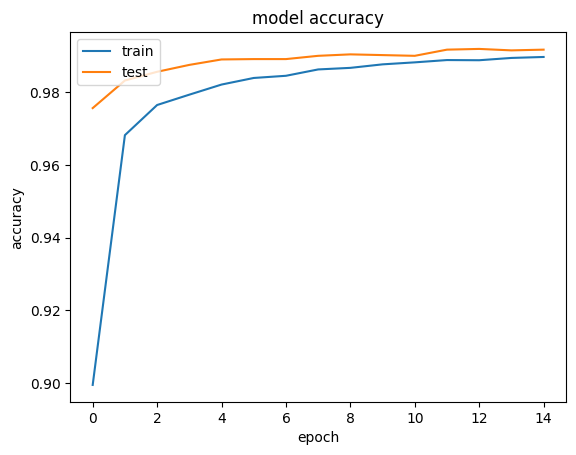

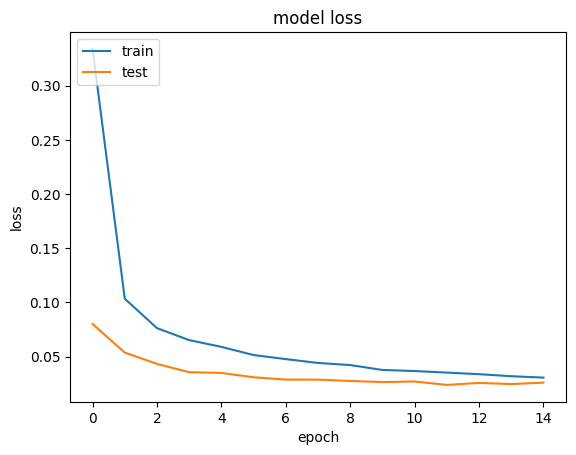

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Evaluate the model

In [ ]:
model_cnn.evaluate(X_valid_cnn, y_validation)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9891 - loss: 0.0316


[0.02594725601375103, 0.9918000102043152]

### 1.2 Your turn! (30 points)

1. Write code to train the same network with different options for `loss`, `optimizer`, learning rate,  `batch_size` and number of epochs.

2. Record the several combinations (at least 3, besides the baseline) you have tried and the resulting accuracy in a summary table similar to the one for item 1.1.

3. Write a short paragraph summarizing what you have learned from this exercise.

### 1.3 BONUS! (10 points)

1. Change the architecture of the CNN (number of layers, use of (and amount of) Dropout,  conv2D layers' [parameters](https://keras.io/api/layers/convolution_layers/convolution2d/) (stride, padding, kernel size, etc.), type and parameters of [pooling layers](https://https://keras.io/api/layers/pooling_layers/), etc.)

2. Record the several combinations (at least 3, besides the baseline) you have tried and the resulting accuracy in a summary table similar to the one for item 1.1.

3. Write a short paragraph summarizing what you have learned from this exercise.

## PART 2: Image classification using the CIFAR-10 dataset
  
In this project you will design and implement a deep learning solution for image classification using the CIFAR-10 dataset.

https://www.cs.toronto.edu/~kriz/cifar.html


See also:

https://www.kaggle.com/c/cifar-10

https://keras.io/examples/vision/metric_learning/

https://www.kaggle.com/roblexnana/cifar10-with-cnn-for-beginer


### Setup

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
# The import path was changed here from `keras.preprocessing.image` to `tensorflow.keras.preprocessing.image`
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import itertools

%matplotlib inline

import random

import tensorflow as tf
from collections import defaultdict
from PIL import Image
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow import keras
from tensorflow.keras import layers

### Load and prepare the data

In [ ]:
# Load the dataset
(x_training, y_training), (x_testing, y_testing) = cifar10.load_data()

# Normalize the image data
x_train = x_training.astype("float32") / 255.0
y_training = np.squeeze(y_training)
x_test = x_testing.astype("float32") / 255.0
y_testing = np.squeeze(y_testing)

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = keras.utils.to_categorical(y_training, num_classes)
y_test = keras.utils.to_categorical(y_testing, num_classes)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


### Explore the data

In [ ]:
# Number of samples
print("Number of training samples: ",y_train.shape[0])
print("Number of test samples: ", y_test.shape[0])

Number of training samples:  50000
Number of test samples:  10000


In [ ]:
# Number of classes
num_classes = y_test.shape[1]
print(num_classes)

10


In [ ]:
# Shape of image data
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


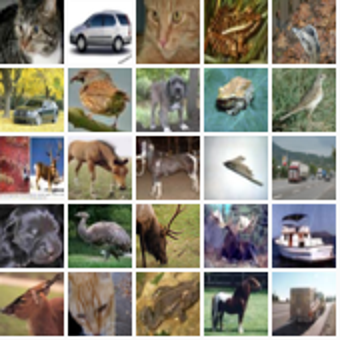

In [ ]:
# Show collage of 25 (randomly selected) images

# Every time you run this cell, you should see 25 different images.
# That's fine (and desired, actually).

height_width = 32

def show_collage(examples):
    box_size = height_width + 2
    num_rows, num_cols = examples.shape[:2]

    collage = Image.new(
        mode="RGB",
        size=(num_cols * box_size, num_rows * box_size),
        color=(250, 250, 250),
    )
    for row_idx in range(num_rows):
        for col_idx in range(num_cols):
            array = (np.array(examples[row_idx, col_idx]) * 255).astype(np.uint8)
            collage.paste(
                Image.fromarray(array), (col_idx * box_size, row_idx * box_size)
            )

    # Double size for visualisation.
    collage = collage.resize((2 * num_cols * box_size, 2 * num_rows * box_size))
    return collage


# Show a collage of 5x5 random images.
sample_idxs = np.random.randint(0, 50000, size=(5, 5))
examples = x_train[sample_idxs]
show_collage(examples)

In [ ]:
idx = y_training[0]
print(idx)

6


In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [ ]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [ ]:
labels[idx]

'Frog'

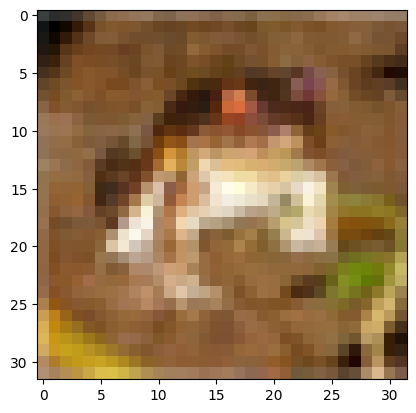

In [ ]:
plt.imshow(x_train[0])

### 2a. Baseline model

Let's start by using a convolutional neural network (CNN) built from scratch as a baseline.


#### Build and configure the model

In [ ]:
batch_size = 128
epochs = 40
data_augmentation = False

In [ ]:
#define the convnet
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTEN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 15, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           5,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,250,858 (4.77 MB)

 Trainable params: 1,250,858 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


#### Train the model

In [ ]:
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.1844 - loss: 2.1739 - val_accuracy: 0.3611 - val_loss: 1.8258
Epoch 2/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.3587 - loss: 1.7858 - val_accuracy: 0.4174 - val_loss: 1.6168
Epoch 3/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.3989 - loss: 1.6523 - val_accuracy: 0.4616 - val_loss: 1.4897
Epoch 4/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.4430 - loss: 1.5426 - val_accuracy: 0.4854 - val_loss: 1.4166
Epoch 5/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.4639 - loss: 1.4790 - val_accuracy: 0.5188 - val_loss: 1.3528
Epoch 6/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4877 - loss: 1.4218 - val_accuracy: 0.5335 - val_loss: 1.3104
Epoch 7/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.5015 - loss: 1.3798 - val_accuracy: 0.5389 - val_loss: 1.2871
Epoch 8/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5244 - loss: 1.3277 - val_accura

In [ ]:
def plotmodelhistory(history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


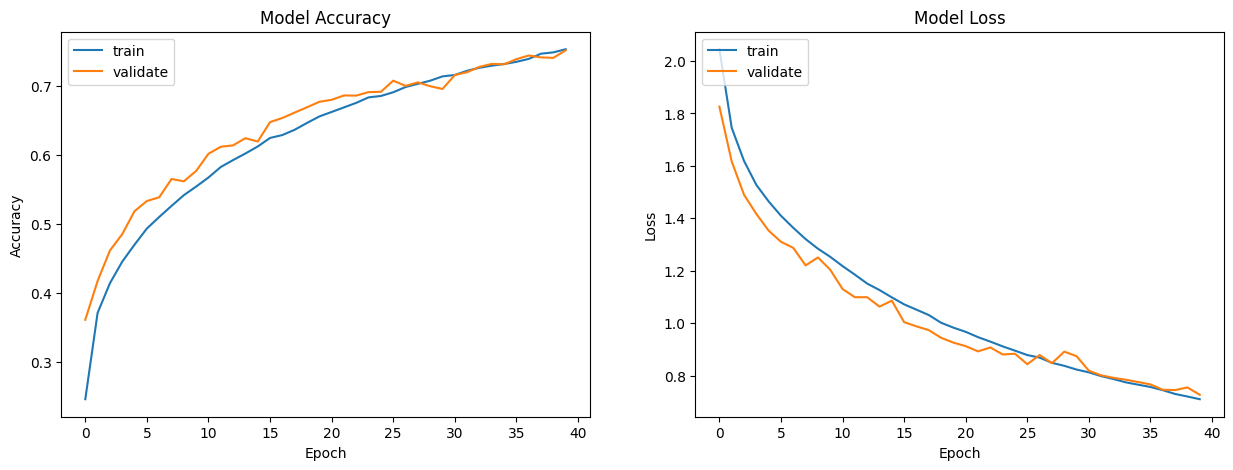

In [ ]:
plotmodelhistory(history)

#### Evaluate the model

In [ ]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7514 - loss: 0.7272
Test loss: 0.7268629670143127
Test accuracy: 0.7522000074386597
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    A function to annotate a heatmap.
    """
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > thresh else "black")
            texts.append(text)

    return texts

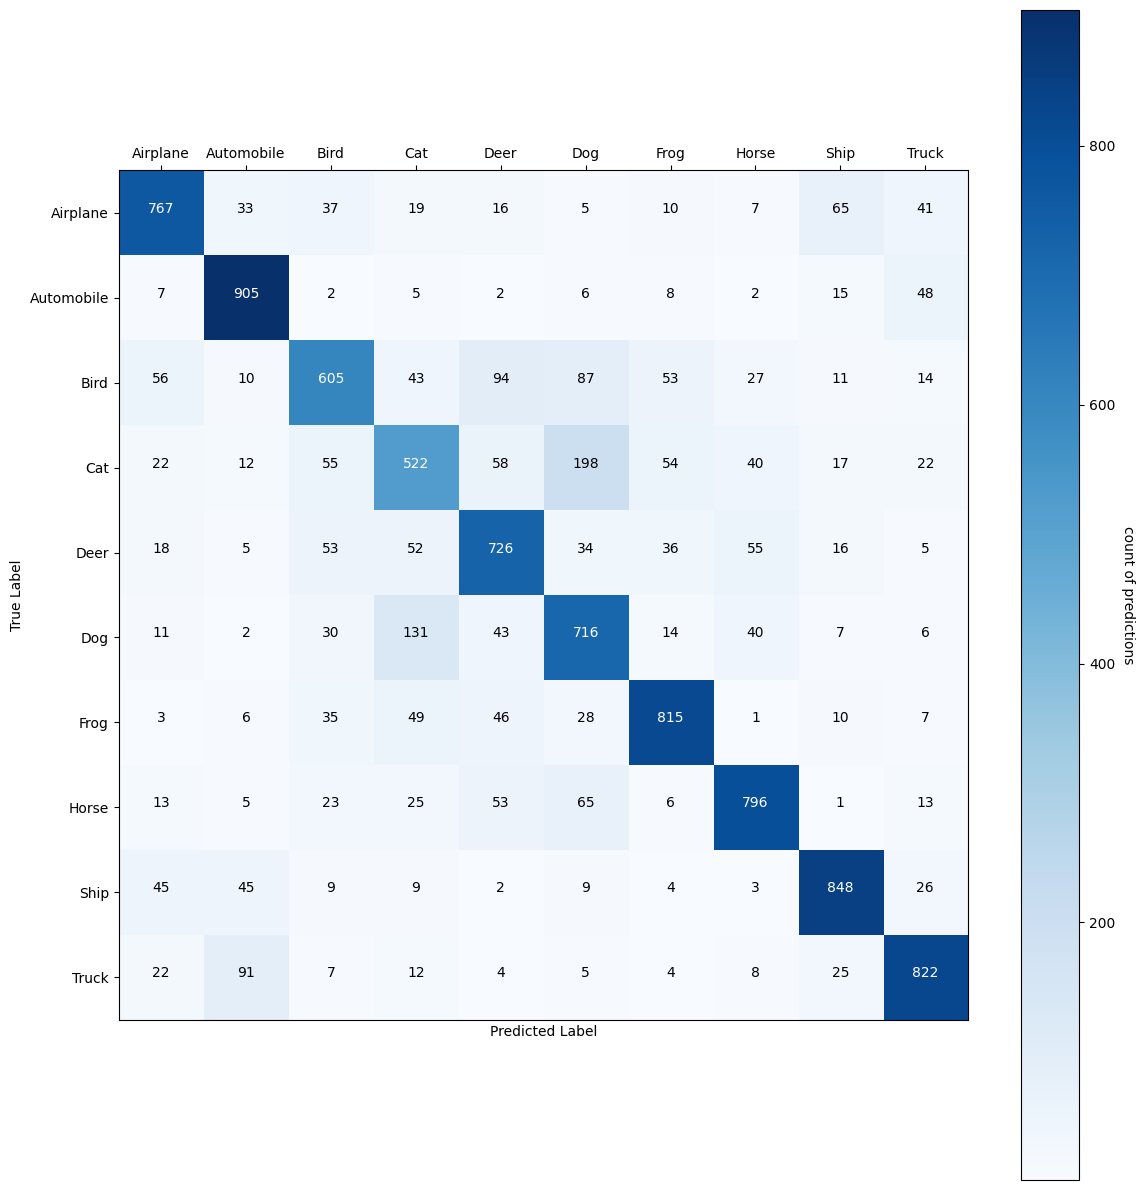

In [ ]:
# Plot confusion matrix

# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = x_test[errors]

cm = confusion_matrix(Y_true, Y_pred_classes)
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()

In [ ]:
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1000
           1       0.81      0.91      0.86      1000
           2       0.71      0.60      0.65      1000
           3       0.60      0.52      0.56      1000
           4       0.70      0.73      0.71      1000
           5       0.62      0.72      0.67      1000
           6       0.81      0.81      0.81      1000
           7       0.81      0.80      0.80      1000
           8       0.84      0.85      0.84      1000
           9       0.82      0.82      0.82      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



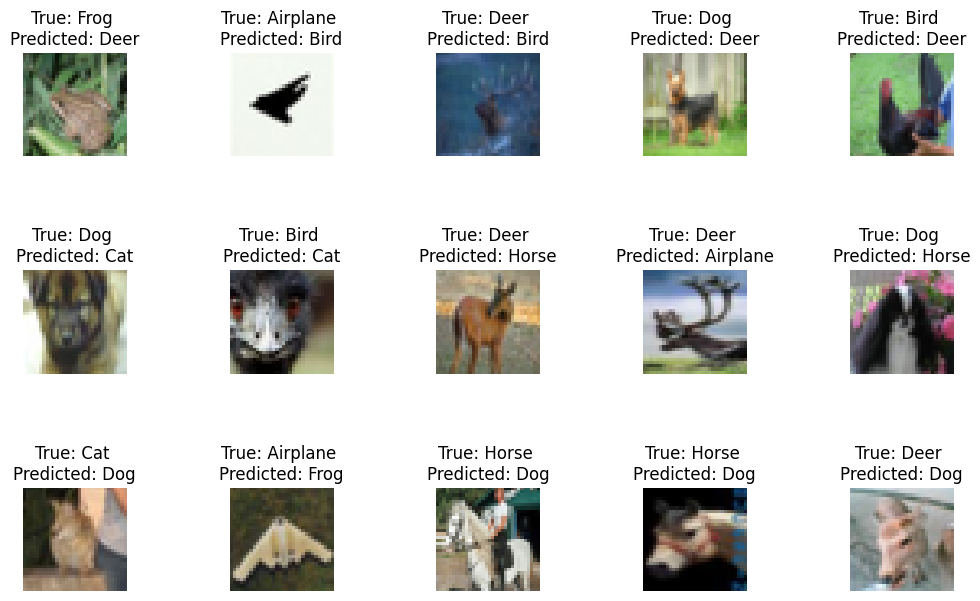

In [ ]:
# Inspect errors
R = 3
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,8))
axes = axes.ravel()

misclassified_idx = np.where(Y_pred_classes != Y_true)[0]
for i in np.arange(0, R*C):
    axes[i].imshow(x_test[misclassified_idx[i]])
    axes[i].set_title("True: %s \nPredicted: %s" % (labels[Y_true[misclassified_idx[i]]],
                                                  labels[Y_pred_classes[misclassified_idx[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [ ]:
def show_test(number):
    fig = plt.figure(figsize = (3,3))
    test_image = np.expand_dims(x_test[number], axis=0)
    # test_result = model.predict_classes(test_image)
    test_result = np.argmax(model.predict(test_image), axis=-1)
    plt.imshow(x_test[number])
    dict_key = test_result[0]
    plt.title("Predicted: {} \nTrue Label: {}".format(labels[dict_key],
                                                      labels[Y_true[number]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


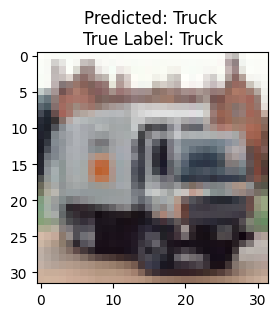

In [ ]:
show_test(11)

### 2b. Transfer Learning

Now we will see how we could use a [pretrained (on ImageNet) model](https://https://keras.io/api/applications/) to perform the same task (image classification) using a different dataset (CIFAR-10), using the *transfer learning* paradigm.

See:

https://www.kaggle.com/adi160/cifar-10-keras-transfer-learning

https://keras.io/guides/transfer_learning/

#### Transfer Learning: setup

In [ ]:
from keras import Sequential
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import VGG16
from keras.applications.resnet import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Changed import here
from tensorflow.keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
#Import dataset (again)
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

In [ ]:
#Print the dimensions of the datasets to make sure everything's kosher

print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))


In [ ]:
#One hot encode the labels.Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10

y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [ ]:
# Lets print the dimensions one more time to see if things changed the way we expected

print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


#### Attempt #1: using ResNet50 as a base model

Learn more about ResNet50 at: https://www.kaggle.com/keras/resnet50

In [ ]:
base_model_1 = ResNet50(include_top=False,
                        weights='imagenet',
                        input_shape=(32,32,3),
                        classes=y_train.shape[1])

model_1=Sequential()
#Add the Dense layers along with activation and batch normalization
model_1.add(base_model_1)
model_1.add(Flatten())

#Add the Dense layers along with activation and batch normalization
model_1.add(Dense(4000,activation=('relu'),input_dim=512))
model_1.add(Dense(2000,activation=('relu')))
model_1.add(Dense(1000,activation=('relu')))
model_1.add(Dense(500,activation=('relu')))
model_1.add(Dense(10,activation=('softmax'))) #This is the classification layer

model_1.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 1, 1, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4000)                │       8,196,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 2000)                │       8,002,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1000)                │       2,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 500)                 │         500,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,292,222 (161.33 MB)

 Trainable params: 42,239,102 (161.13 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
batch_size= 128
epochs=10
learn_rate=.001

sgd=SGD(learning_rate=learn_rate,momentum=.9,nesterov=False)
adam=Adam(learning_rate=learn_rate)

In [ ]:
# Compile the model
model_1.compile(optimizer=sgd,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# Train the model
history_1 = model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose = 1,
              validation_data=(x_val, y_val),
              shuffle=True)

Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 76s 139ms/step - accuracy: 0.3168 - loss: 1.9194 - val_accuracy: 0.5795 - val_loss: 1.2401
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 42s 62ms/step - accuracy: 0.6876 - loss: 0.8926 - val_accuracy: 0.6863 - val_loss: 0.9170
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - accuracy: 0.7893 - loss: 0.6004 - val_accuracy: 0.7111 - val_loss: 0.8568
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.8646 - loss: 0.4019 - val_accuracy: 0.7268 - val_loss: 0.8539
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.9098 - loss: 0.2714 - val_accuracy: 0.7337 - val_loss: 0.8953
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 17s 64ms/step - accuracy: 0.9389 - loss: 0.1846 - val_accuracy: 0.7251 - val_loss: 1.0422
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step - accuracy: 0.9533 - loss: 0.1413 - val_accuracy: 0.7348 - val_loss: 1.0969
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - accuracy: 0.9639 - loss: 0.1072 -

In [ ]:
def plotmodelhistory(history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history_1.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


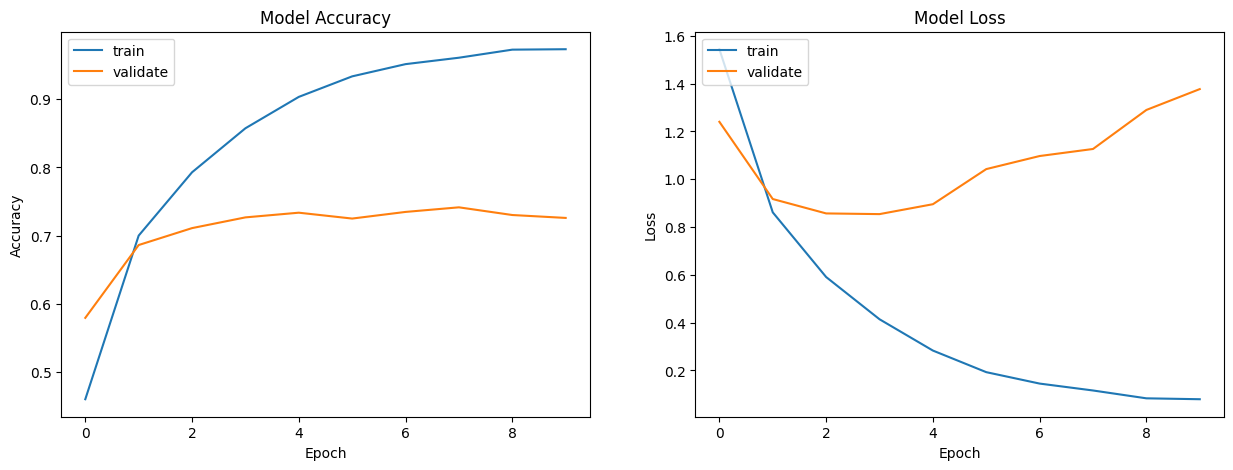

In [ ]:
plotmodelhistory(history_1)

In [ ]:
# Score trained model.
scores = model_1.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model_1.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7223 - loss: 1.4261
Test loss: 1.4059966802597046
Test accuracy: 0.7243000268936157
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step


In [ ]:
  def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


In [ ]:
y_pred = np.argmax(model_1.predict(x_test), axis=-1)
y_true=np.argmax(y_test,axis=1)

#Compute the confusion matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


Confusion matrix, without normalization


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

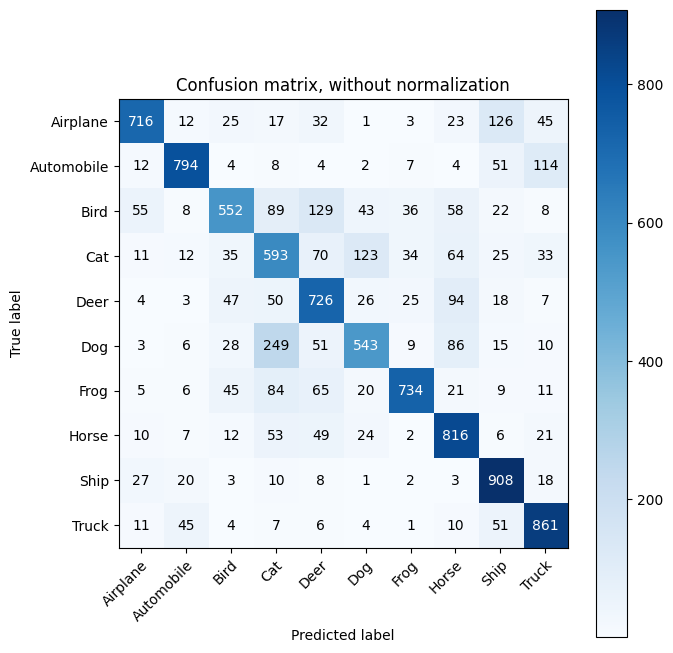

In [ ]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=labels,
                      title='Confusion matrix, without normalization')

Normalized confusion matrix


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

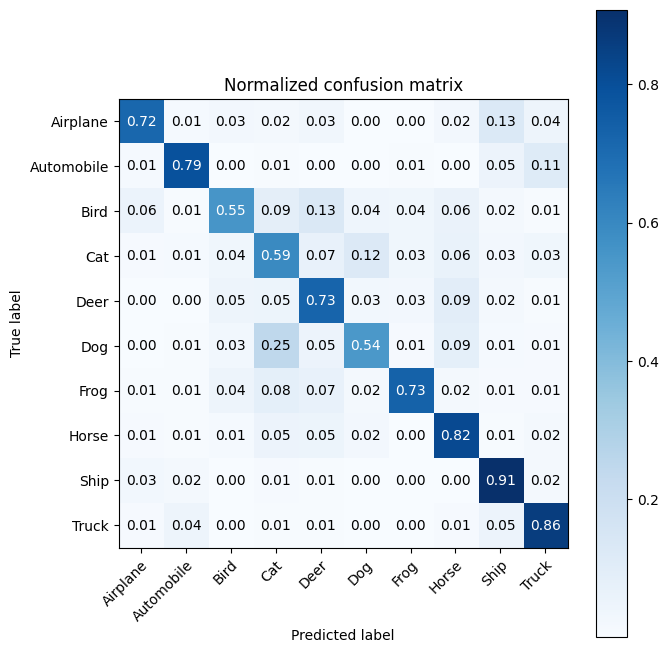

In [ ]:
# Plot normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=labels, normalize=True,
                      title='Normalized confusion matrix')
# plt.show()

### 2.1 Your turn! (30 points)

1. Write code to build, train, and evaluate at least three additional transfer learning models and combinations of (hyper)parameters.

Here are a few things you could do:
*   Use a different base model, e.g., VGG19 (see https://www.kaggle.com/keras/vgg19)
*   Add Dropout layers
*   Use data augmentation
*   Change optimizer
*   Change other hyperparameters (learning rate, batch size, etc.)

2. Record the several combinations (at least 3, besides the baseline) you have tried and the resulting accuracy in a summary table like this:

| Method | Base model | Relevant (hyper)parameters | Test loss | Test accuracy | Remarks |
| --- | --- | --- | --- | --- | --- |
| Baseline  | ResNet50 | SGD, batch_size= 128, epochs=10, learn_rate=.001 | 1.2025 | 0.7526 | Baseline |
| Variation #1 | ... | ... | ... | ... | Improved accuracy thanks to X |
| Variation #2 | ... | ... | ... | ... | Improved accuracy thanks to Y |
| Variation #3 | ... | ... | ... | ... | Improved accuracy thanks to Z |

3. Write a short paragraph summarizing what you have learned from this exercise.









### Conclusions (10 points)

Write your conclusions and make sure to address the issues below:
- What have you learned from this assignment?
- Which parts were the most fun, time-consuming, enlightening, tedious?
- What would you do if you had an additional week to work on this?

*Enter your conclusions here*